# Support Vector Regressor

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

In [178]:
data = pd.read_csv('austin_final1.csv')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1319 non-null   int64  
 1   Unnamed: 0.1               1319 non-null   int64  
 2   TempHighF                  1319 non-null   int64  
 3   TempAvgF                   1319 non-null   int64  
 4   TempLowF                   1319 non-null   int64  
 5   DewPointHighF              1319 non-null   float64
 6   DewPointAvgF               1319 non-null   float64
 7   DewPointLowF               1319 non-null   float64
 8   HumidityHighPercent        1319 non-null   float64
 9   HumidityAvgPercent         1319 non-null   float64
 10  HumidityLowPercent         1319 non-null   float64
 11  SeaLevelPressureAvgInches  1319 non-null   float64
 12  VisibilityHighMiles        1319 non-null   float64
 13  VisibilityAvgMiles         1319 non-null   float

In [180]:
data['TempHighF'] = data['TempHighF'].astype(float)

In [181]:
x=data.drop(['PrecipitationSumInches'],axis=1).values
y=data['PrecipitationSumInches'].values

In [182]:
y = y.reshape(len(y),-1)

In [183]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [184]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x_train,x_test)
y = sc_y.fit_transform(y_train,y_test)

In [185]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train.ravel())

SVR()

In [186]:
y_test = y_test.flatten()
print(y_test)

[0.   0.31 0.   0.   0.   0.49 0.15 0.   0.   0.   0.09 0.   0.   0.27
 0.   0.   0.01 0.01 0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.02
 1.07 2.6  0.   0.   0.1  0.   0.   0.01 0.   0.   0.   0.35 3.84 0.
 0.   0.08 0.   0.   0.3  1.79 0.   0.43 0.   0.   0.   0.   0.   0.1
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.
 0.04 0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   2.25 0.   0.16 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.59 0.   0.   0.   0.1  0.   0.   0.   0.   0.73 0.
 0.   0.   0.   0.16 0.   0.   0.   0.   1.07 0.   0.   0.02 0.47 0.
 0.   0.   0.   0.26 0.   0.02 0.   0.   0.   0.   0.36 0.   2.45 0.
 0.   0.   0.09 0.   0.71 0.3  0.01 0.   0.   0.   0.   0.04 0.   0.
 0.   0.02 0.   0.   0.   0.   0.01 0.   0.   0.   0.02 0.   0.07 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.56
 0.   0.06 0.   0.   0.   0.   0.   0.   0.   0.27 0.   0.   0.   0.
 0.05 0.   0.   0.   0.   0

In [187]:
y_predict=regressor.predict(x_test)
print(y_predict)

[0.06632398 0.10885679 0.06201138 0.09015757 0.08648396 0.10872963
 0.09315664 0.1073681  0.07300742 0.04767444 0.09519006 0.08793252
 0.08059325 0.10782797 0.08860124 0.09422867 0.1380018  0.07940574
 0.05895371 0.06966727 0.11174353 0.08864347 0.1298389  0.07275234
 0.06875981 0.08558111 0.06669534 0.08250942 0.12508988 0.12533188
 0.07862267 0.08358649 0.10102457 0.08518133 0.07152929 0.12335048
 0.07747344 0.09084958 0.07015672 0.10529118 0.1138411  0.05540792
 0.08016416 0.11487785 0.08022302 0.09024453 0.10432725 0.13004011
 0.09885911 0.12006528 0.09764045 0.06617164 0.09227015 0.08144641
 0.09748804 0.11199899 0.08160989 0.07933409 0.05142019 0.09069716
 0.09380108 0.08883488 0.05678036 0.09942641 0.09665566 0.08812282
 0.09249815 0.0605084  0.06606597 0.10047707 0.10523499 0.05946377
 0.08329371 0.08733874 0.10753078 0.07374272 0.0948166  0.09481348
 0.08476266 0.04631974 0.08456849 0.0807069  0.08135206 0.08756088
 0.06676329 0.09792271 0.12459367 0.06308909 0.09905339 0.0726

In [188]:
import scipy.stats as st
import sklearn.metrics as sm
print("Accuracy of the model =",regressor.score(x_train, y_train))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict),2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict), 2))

Accuracy of the model = 0.03754410612159176
Mean absolute error = 0.19
Mean squared error = 0.25
Median absolute error = 0.09
Explain variance score = 0.03
R2 score = 0.02


Text(0.5, 1.0, 'Actual vs predicated')

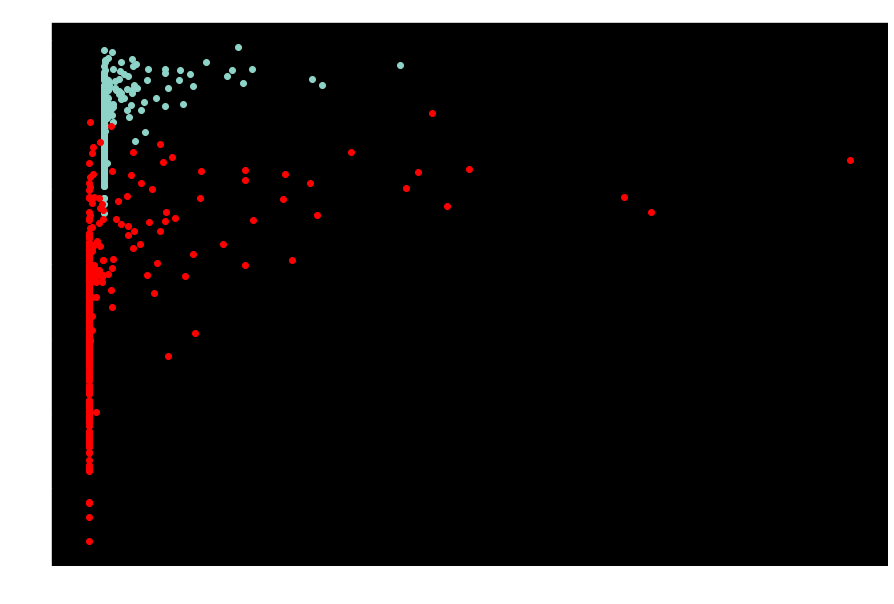

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10)) 
plt.scatter(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predict))
plt.plot(y_test,y_predict,'ro')#actual data
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicated')

In [191]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

data.head()

,Actual,Predicted
0,0.00,0.066324
1,0.31,0.108857
2,0.00,0.062011
3,0.00,0.090158
4,0.00,0.086484
